In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("../data/cleaned/final_merged_dataset.csv")

# Check shape and basic info
print(df.shape)
df.info()

(6930, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6930 entries, 0 to 6929
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   State                           6930 non-null   object 
 1   Crime_Type                      6930 non-null   object 
 2   Year                            6930 non-null   int64  
 3   Cases                           6930 non-null   int64  
 4   unemployment_rate               6930 non-null   float64
 5   poverty_rate                    6930 non-null   float64
 6   per_capita_income               6930 non-null   float64
 7   inflation_rate                  6930 non-null   float64
 8   population_density              6930 non-null   int64  
 9   gender_ratio                    6930 non-null   int64  
 10  literacy_rate                   6930 non-null   float64
 11  youth_population_percent        6930 non-null   float64
 12  urbanization_rate      

In [5]:
# Display first few rows
df.head()

# Summary statistics
df.describe(include='all')

# Check for missing values
df.isnull().sum()

# Check for duplicates
df.duplicated().sum()


np.int64(0)

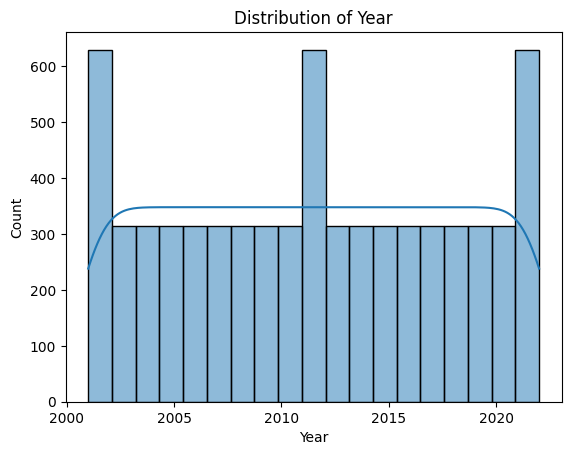

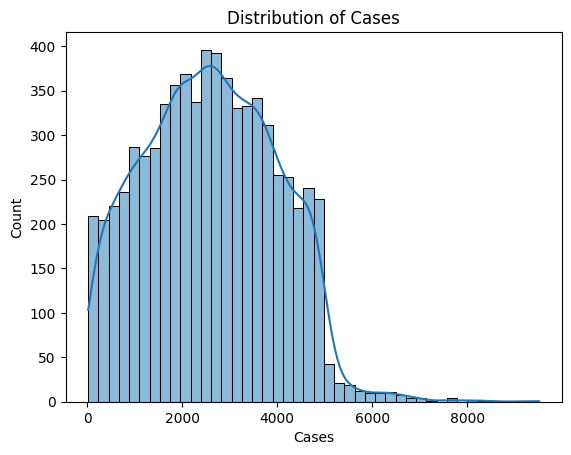

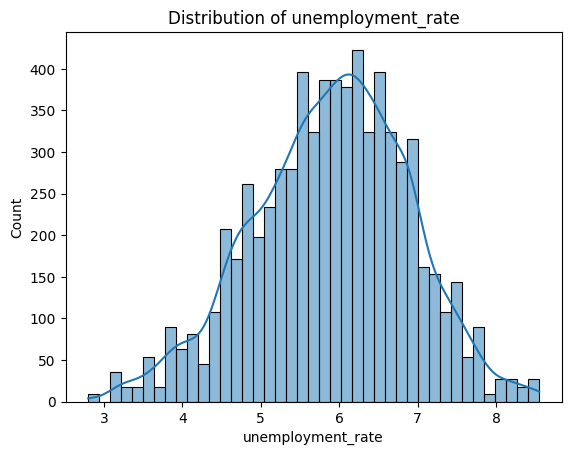

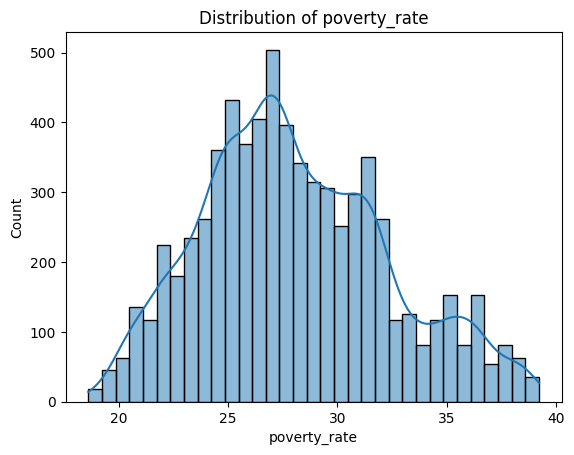

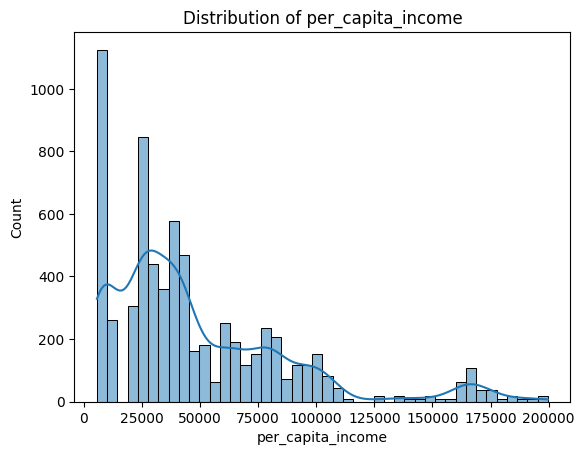

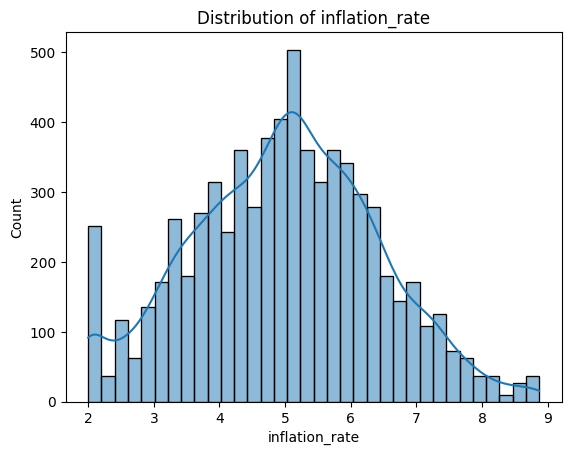

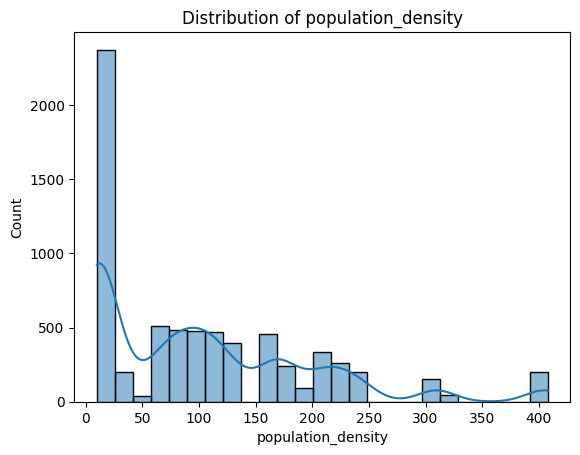

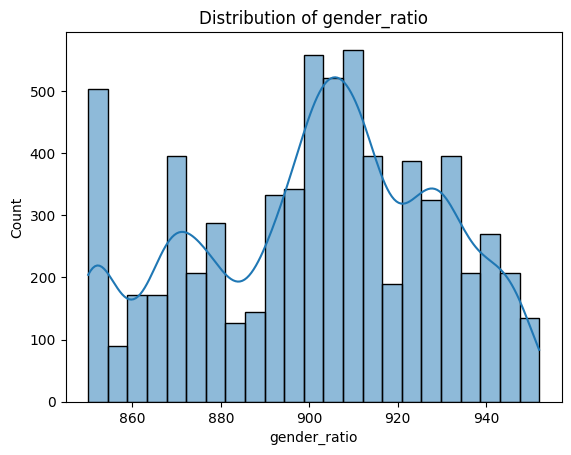

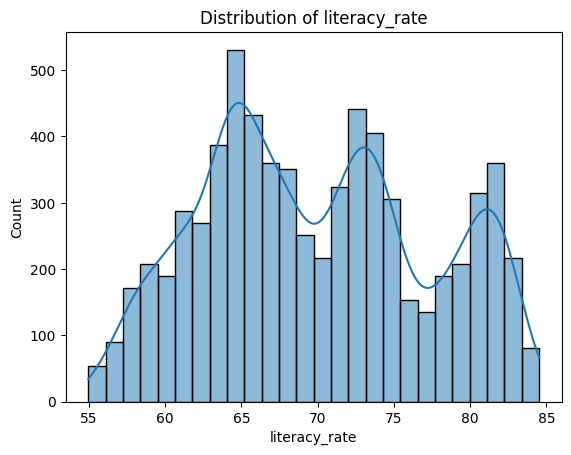

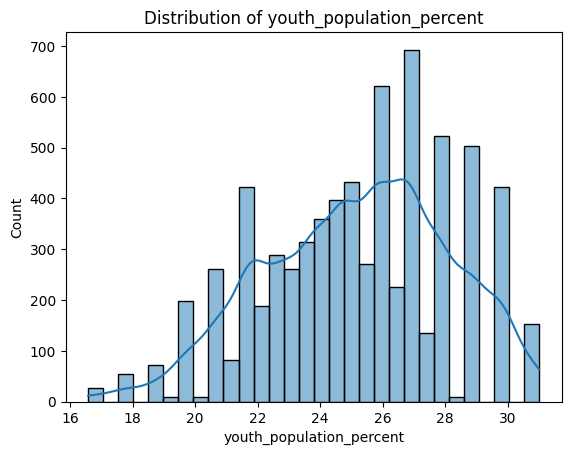

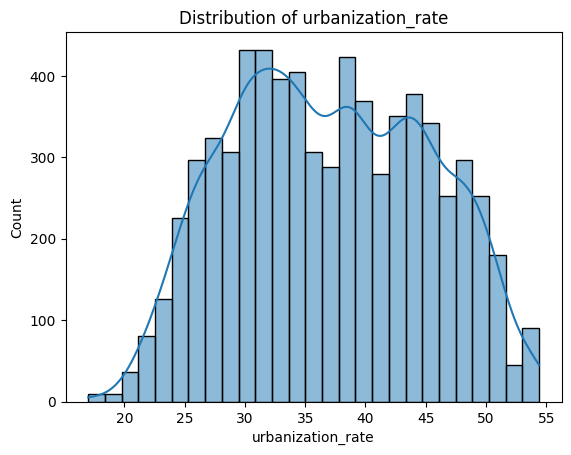

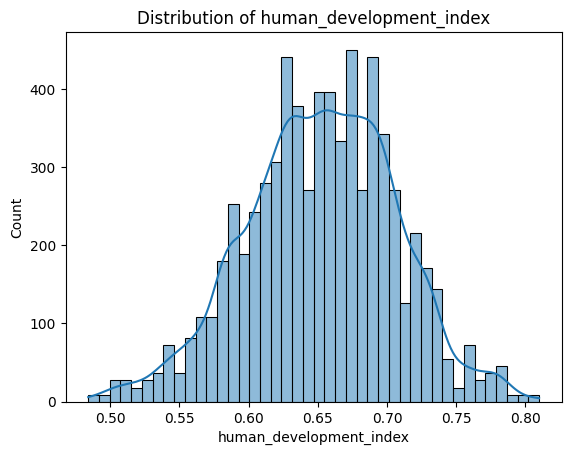

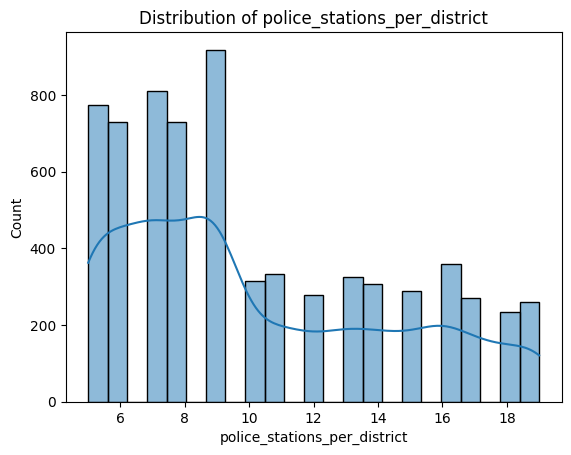

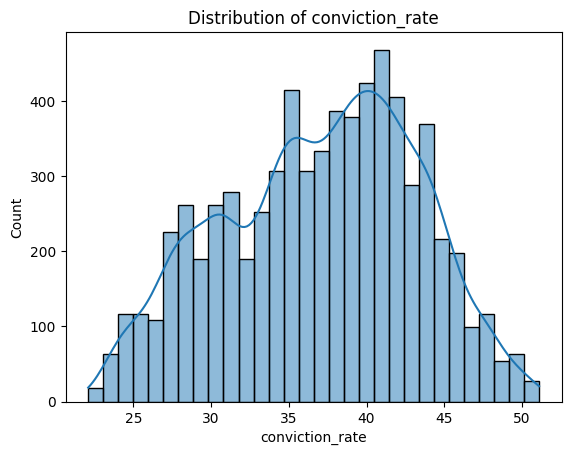

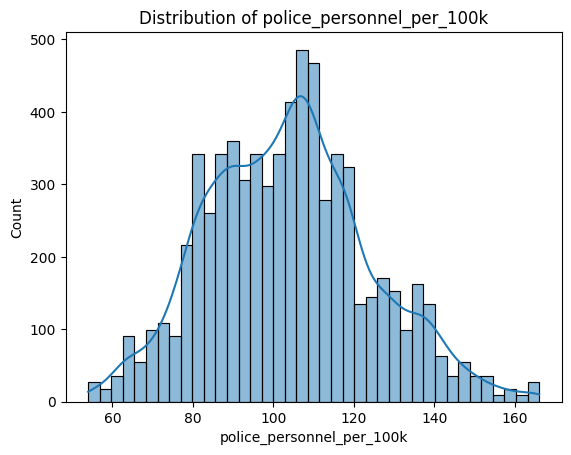

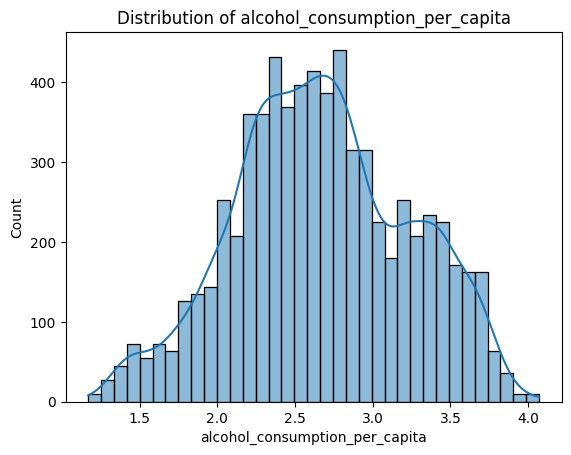

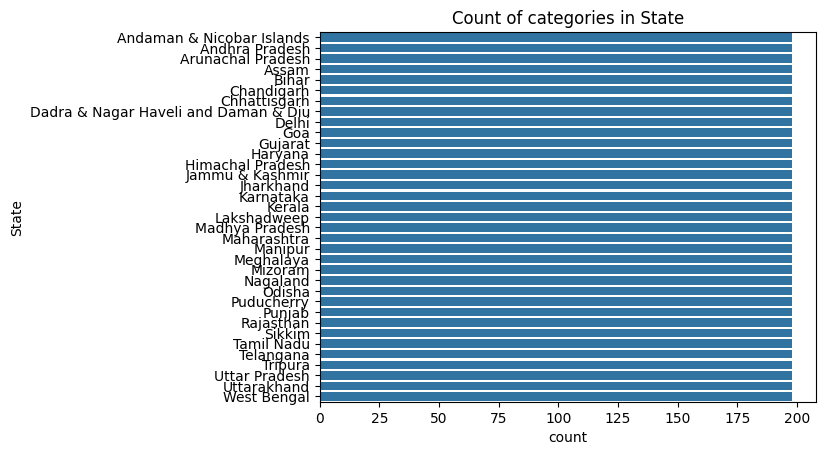

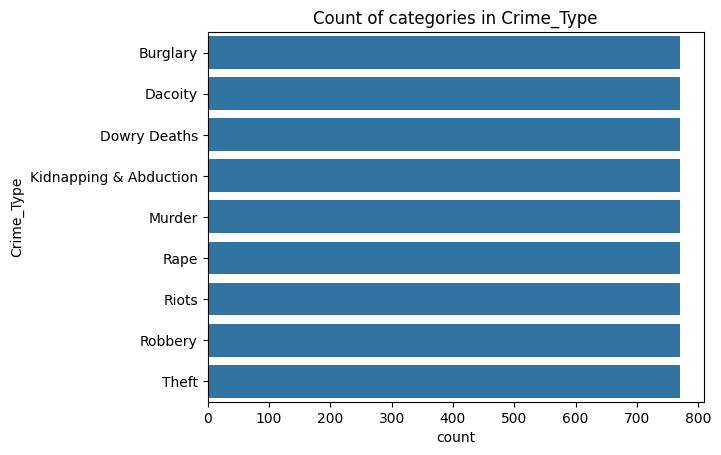

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure()
    sns.countplot(y=col, data=df)
    plt.title(f"Count of categories in {col}")
    plt.show()


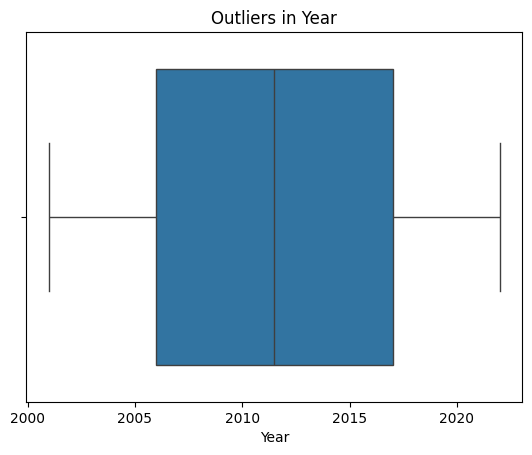

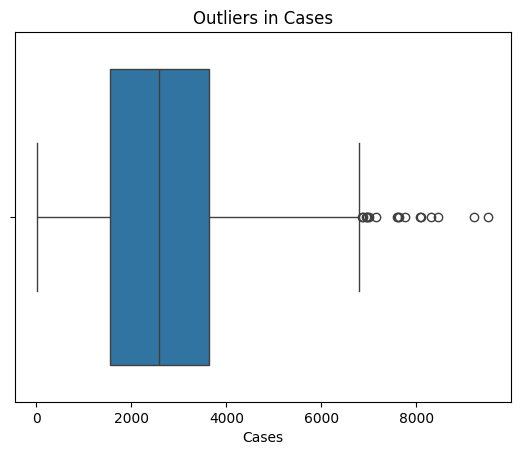

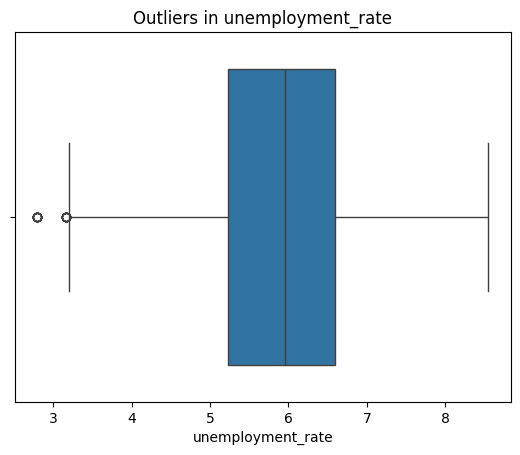

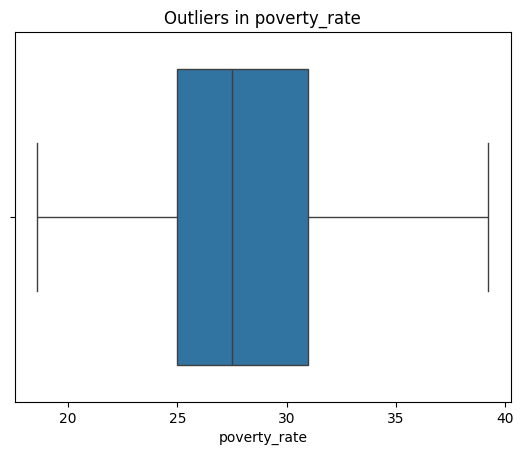

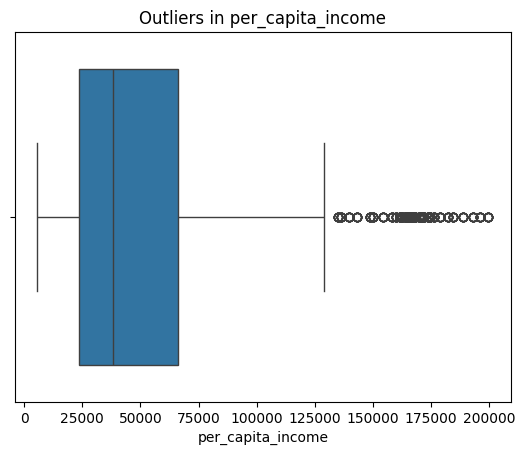

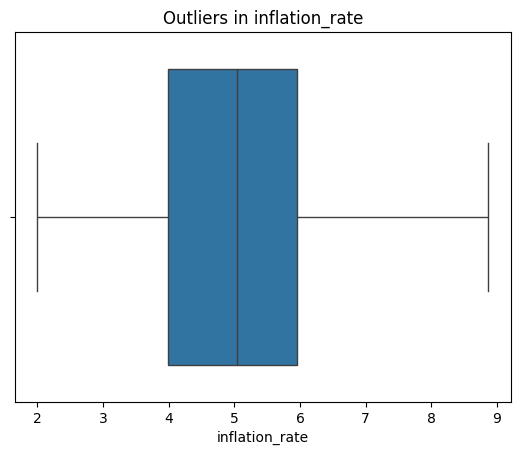

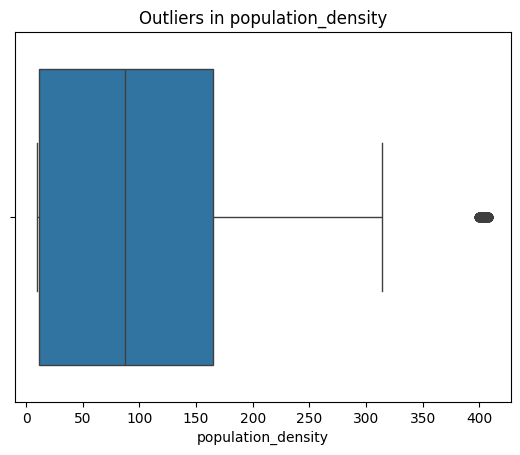

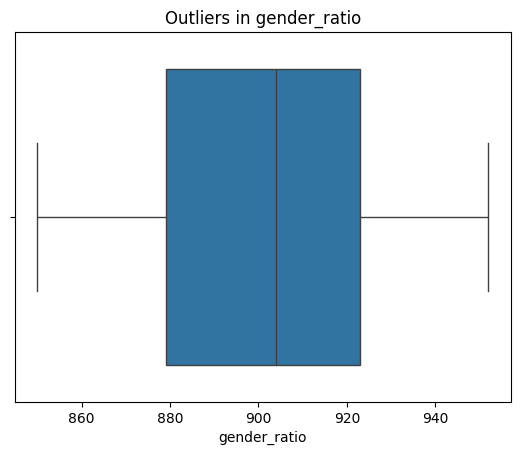

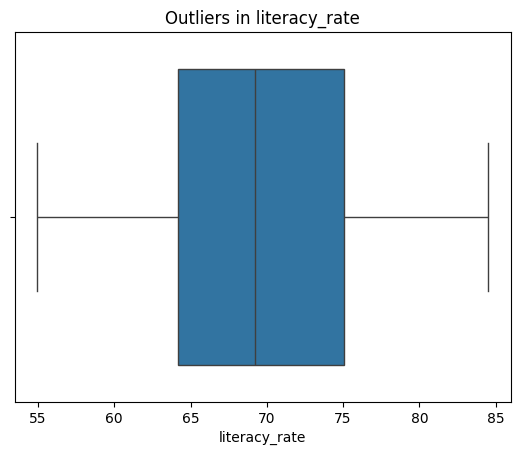

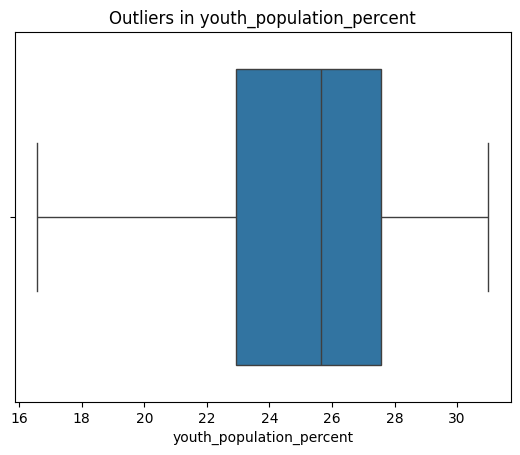

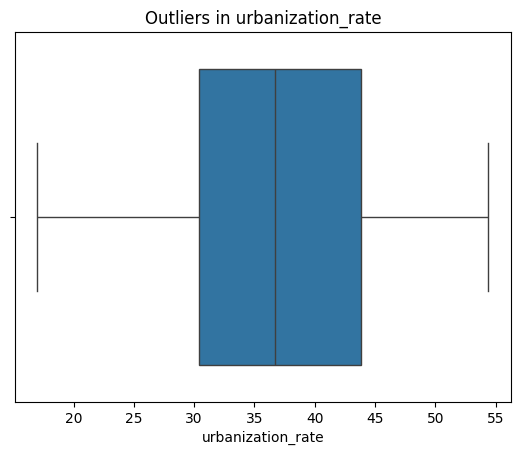

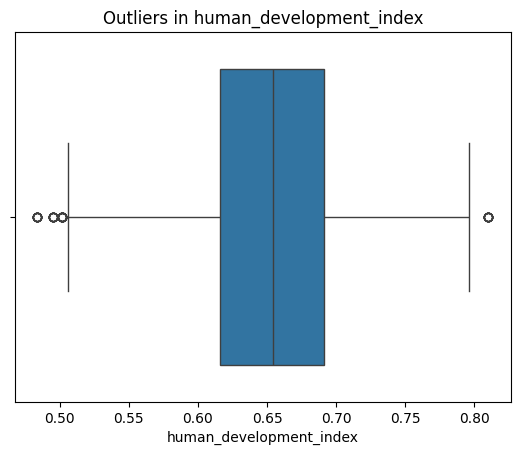

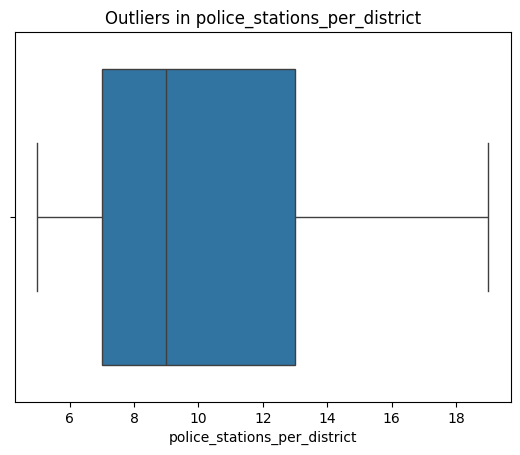

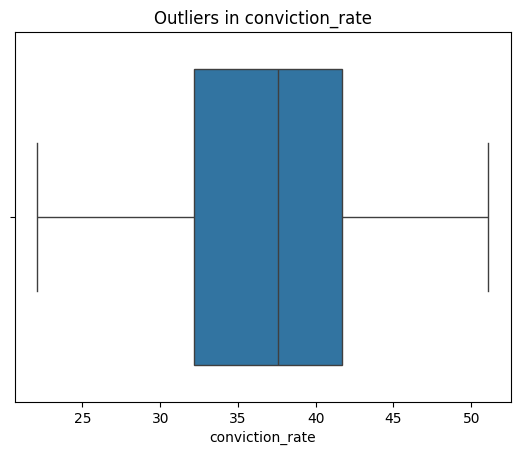

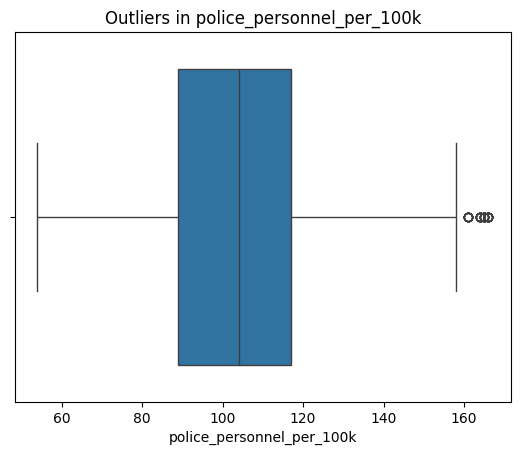

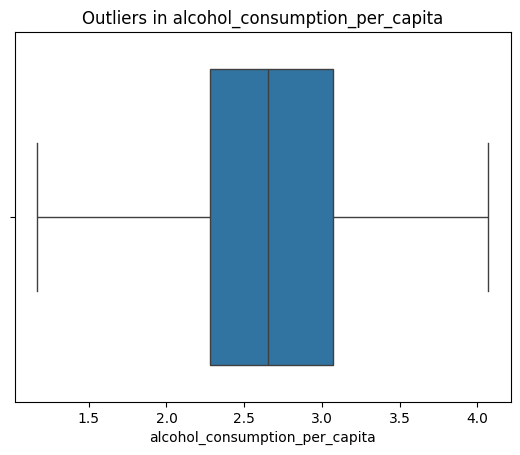

In [10]:
for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.show()


Shape: (6930, 18)
Numeric columns: (6930, 16)


C:\Users\vaish\AppData\Local\Temp\ipykernel_21452\1740427327.py:12: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col].str.replace(',',''), errors='ignore')


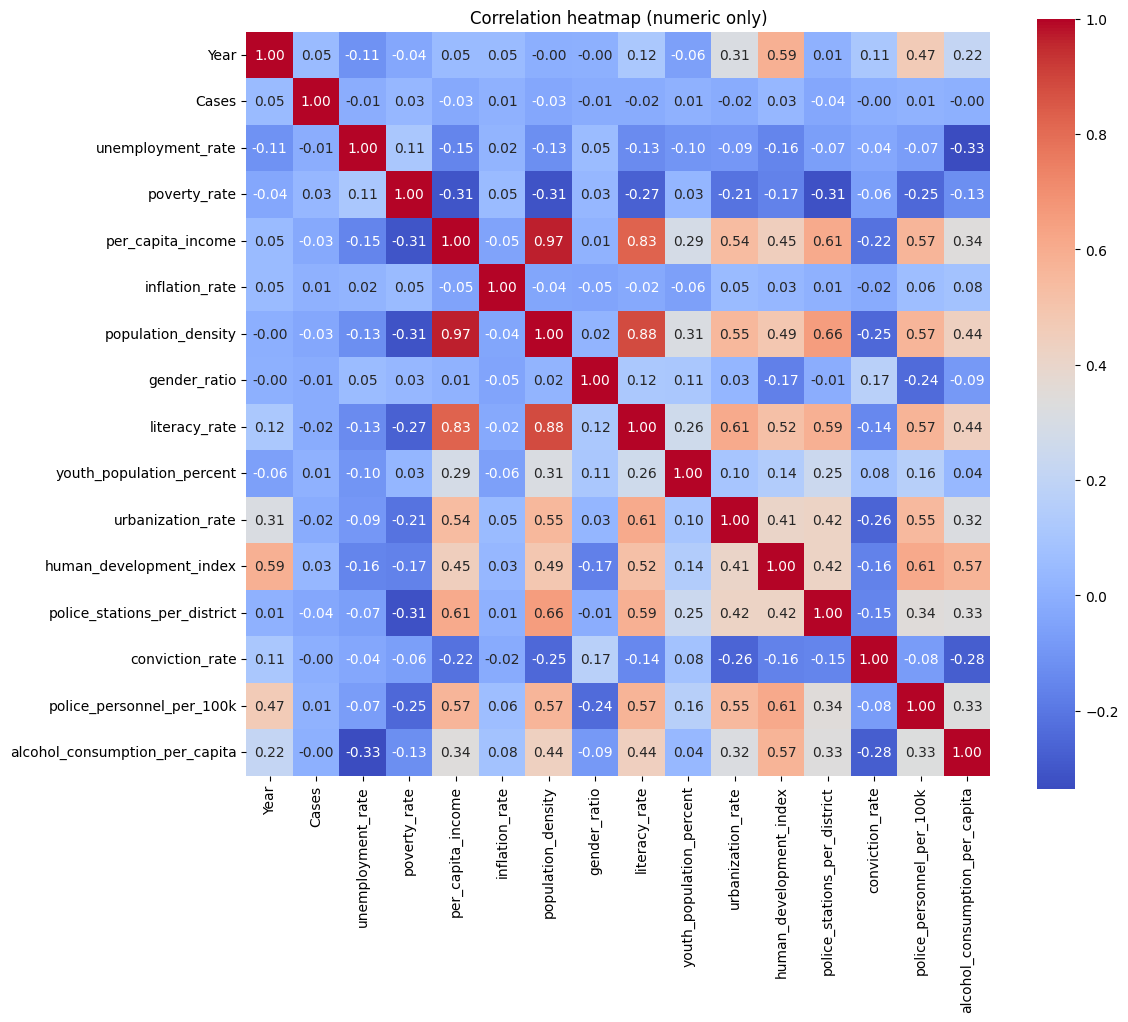

Target 'target_col' not found among numeric columns.


In [12]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

# 1. Quick checks
print("Shape:", df.shape)
print("Numeric columns:", df.select_dtypes(include=[np.number]).shape)

# 2. Convert numeric-like strings (optional)
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col].str.replace(',',''), errors='ignore')
        except Exception:
            pass

# 3. Correlation heatmap on numeric columns
num_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12,10))
sns.heatmap(num_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation heatmap (numeric only)")
plt.show()

# 4. Correlation with target (replace 'target_col')
target = 'target_col'  # <-- change this
if target in num_df.columns:
    print(num_df.corr()[target].sort_values(ascending=False))
else:
    print(f"Target '{target}' not found among numeric columns.")
